In [76]:
# Import libraries

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix
import datetime


# Pretty display for notebooks

%matplotlib inline


# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
submission_example = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission_example.shape)

coulmns_should_be_integer_type_of_data = ["tmax", "tmin", "tavg", "dewpoint", "wetbulb", "heat", "cool"]
coulmns_should_be_float_type_of_data = ["snowfall", "preciptotal", "stnpressure", "sealevel", "depart",\
                                        "resultspeed", "resultdir", "avgspeed"]

import pickle
import costum_functions as cf

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df_train_with_weather = pd.read_csv("df_train_with_weather_201806251508.csv")

def addDays(date):
    temp = date.split("-")
    year, month, date = int(temp[0]), int(temp[1]), int(temp[2])
    return datetime.datetime(year, month, date).weekday()
df_train_with_weather["day"] = df_train_with_weather["date"].apply(addDays)

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


In [77]:
df = df_train_with_weather[["item_nbr", "units"]]

In [78]:
df = df.groupby("item_nbr").agg(["max", "mean"])

In [79]:
df.tail()

units          
           max      mean
item_nbr                
107          7  0.012837
108         21  0.049159
109         30  0.101154
110         94  0.033702
111         12  0.006106

In [80]:
item_1 = df_train_with_weather[df_train_with_weather["item_nbr"] == 1]

In [81]:
item_1_without_tmax_M =item_1[item_1["tmax"] != "M"]

In [82]:
item_1_without_tmax_M["tmax"] = item_1_without_tmax_M["tmax"].astype(int)

In [83]:
xx = np.linspace(-12, 115, 40596)

In [84]:
df_train_with_weather["date"] = df_train_with_weather["date"].apply(cf.dateToNumeric)

In [85]:
df_weather["station_nbr"].unique()

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20,  5], dtype=int64)

In [86]:
df.head()

units           
           max       mean
item_nbr                 
1            9   0.018702
2           15   0.078582
3           12   0.016226
4            7   0.008365
5         5568  20.352452

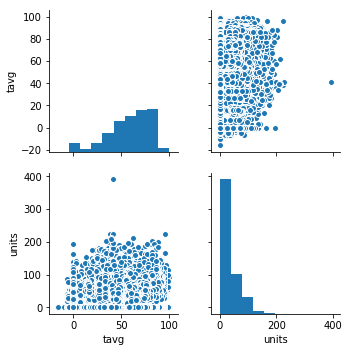

In [47]:
# 3번 스테이션의 pair plot
df = df_train_with_weather[df_train_with_weather["station_nbr"] == 3]
df = df_train_with_weather[df_train_with_weather["item_nbr"] == 45]


def changeType(a):
    if(a != "M"):
        return int(a)
    else:
        return 0

def changeFloatType(a):
    a = str(a).strip()
    if(a != "M" and a.strip() != "T"):
        return float(a)
    else:
        return 0

df["tavg"] = df["tavg"].apply(changeType)
df["units"] = df["units"].apply(changeType)
df["heat"] = df["heat"].apply(changeType)
df["cool"] = df["cool"].apply(changeFloatType)
df["depart"] = df["depart"].apply(changeType)

cols = ["tavg", "units"]
sns.pairplot(df[cols])
plt.show()

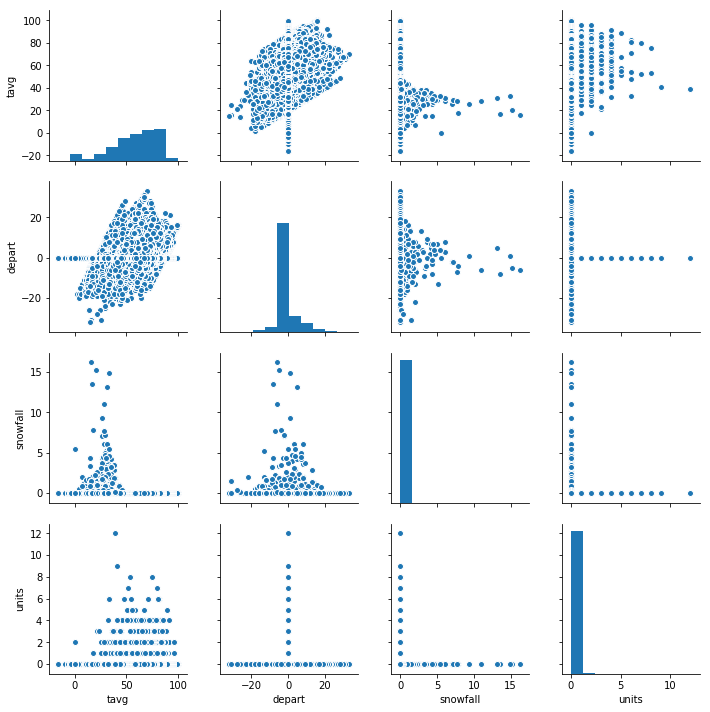

In [37]:
# 6번 스테이션의 pair plot
df = df_train_with_weather[df_train_with_weather["station_nbr"] == 6]
df = df_train_with_weather[df_train_with_weather["item_nbr"] == 10]
def changeType(a):
    if(a != "M"):
        return int(a)
    else:
        return 0

def changeFloatType(a):
    a = str(a).strip()
    if(a != "M" and a.strip() != "T"):
        return float(a)
    else:
        return 0

df["units"] = df["units"].apply(changeType)
df["tavg"] = df["tavg"].apply(changeType)
df["snowfall"] = df["snowfall"].apply(changeFloatType)
df["depart"] = df["depart"].apply(changeType)

cols = ["tavg", "depart", "snowfall", "units"]
sns.pairplot(df[cols])
plt.show()

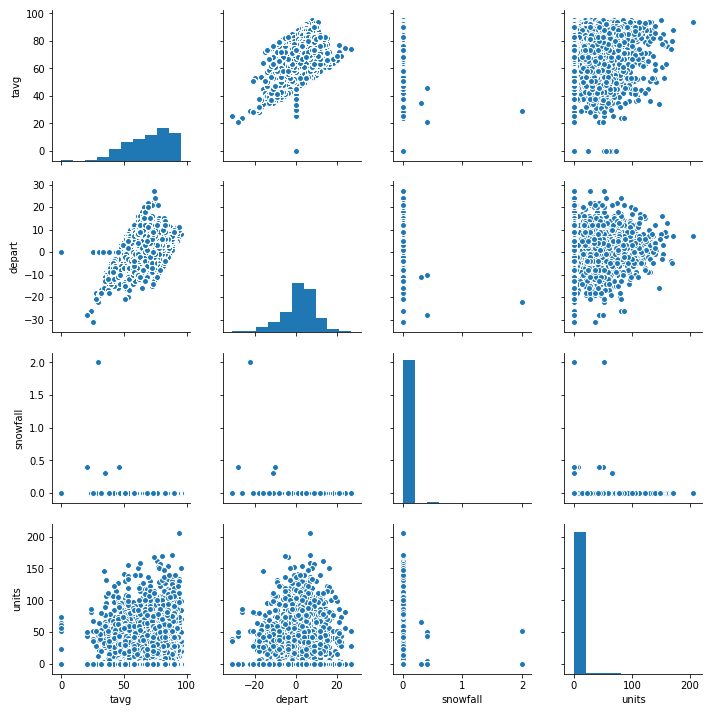

In [30]:
# 18번 스테이션의 pair plot
df = df_train_with_weather[df_train_with_weather["station_nbr"] == 18]

def changeType(a):
    if(a != "M"):
        return int(a)
    else:
        return 0

def changeFloatType(a):
    a = str(a).strip()
    if(a != "M" and a.strip() != "T"):
        return float(a)
    else:
        return 0

df["units"] = df["units"].apply(changeType)
df["units"] = df["units"].apply(changeType)
df["tavg"] = df["tavg"].apply(changeType)
df["snowfall"] = df["snowfall"].apply(changeFloatType)
df["depart"] = df["depart"].apply(changeType)

cols = ["tavg", "depart", "snowfall", "units"]
sns.pairplot(df[cols])
plt.show()

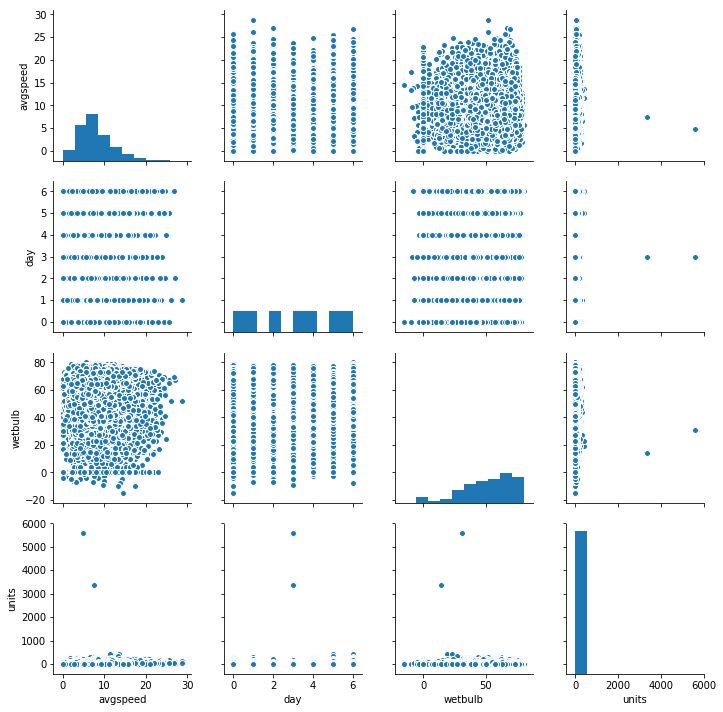

In [64]:
#5번 아이템의 판매량
df = df_train_with_weather[df_train_with_weather["item_nbr"] == 5 ]

df["wetbulb"] = df["wetbulb"].apply(changeType)
df["avgspeed"] = df["avgspeed"].apply(changeFloatType)
df["units"] = df["units"].apply(changeType)
df["tavg"] = df["tavg"].apply(changeType)
df["snowfall"] = df["snowfall"].apply(changeFloatType)
df["depart"] = df["depart"].apply(changeType)

cols = ["avgspeed", "day", "wetbulb", "units"]
sns.pairplot(df[cols])
plt.show()

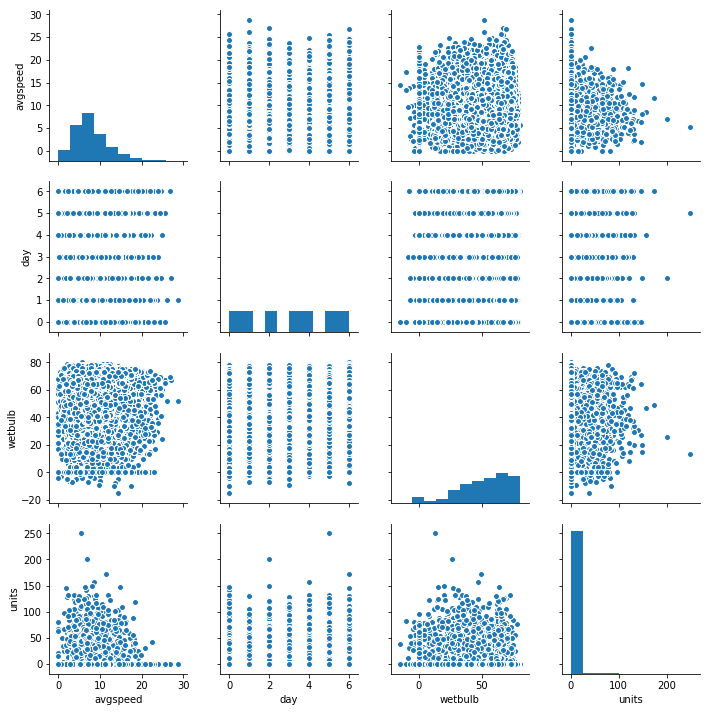

In [65]:
df = df_train_with_weather[df_train_with_weather["item_nbr"] == 6 ]

df["wetbulb"] = df["wetbulb"].apply(changeType)
df["avgspeed"] = df["avgspeed"].apply(changeFloatType)
df["units"] = df["units"].apply(changeType)
df["tavg"] = df["tavg"].apply(changeType)
df["snowfall"] = df["snowfall"].apply(changeFloatType)
df["depart"] = df["depart"].apply(changeType)

cols = ["avgspeed", "day", "wetbulb", "units"]
sns.pairplot(df[cols])
plt.show()

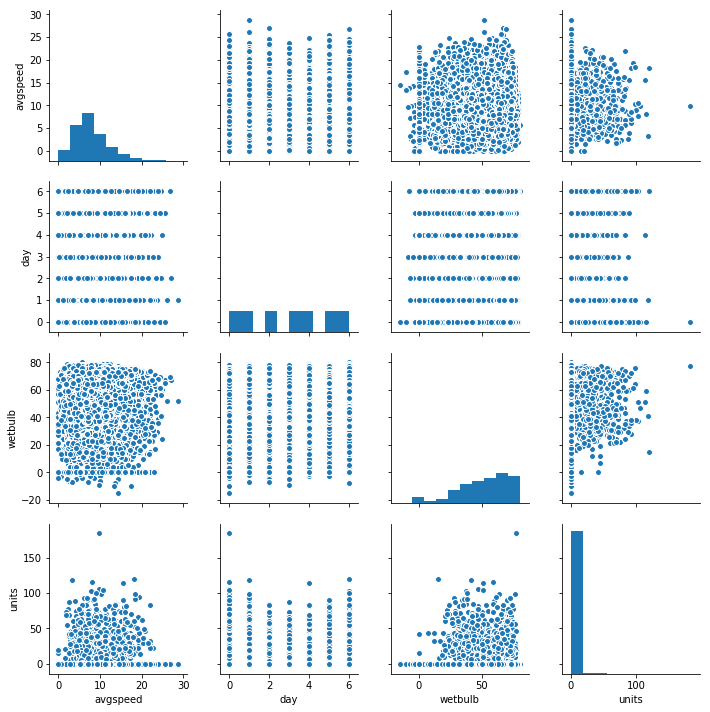

In [66]:
df = df_train_with_weather[df_train_with_weather["item_nbr"] == 8 ]

df["wetbulb"] = df["wetbulb"].apply(changeType)
df["avgspeed"] = df["avgspeed"].apply(changeFloatType)
df["units"] = df["units"].apply(changeType)
df["tavg"] = df["tavg"].apply(changeType)
df["snowfall"] = df["snowfall"].apply(changeFloatType)
df["depart"] = df["depart"].apply(changeType)

cols = ["avgspeed", "day", "wetbulb", "units"]
sns.pairplot(df[cols])
plt.show()

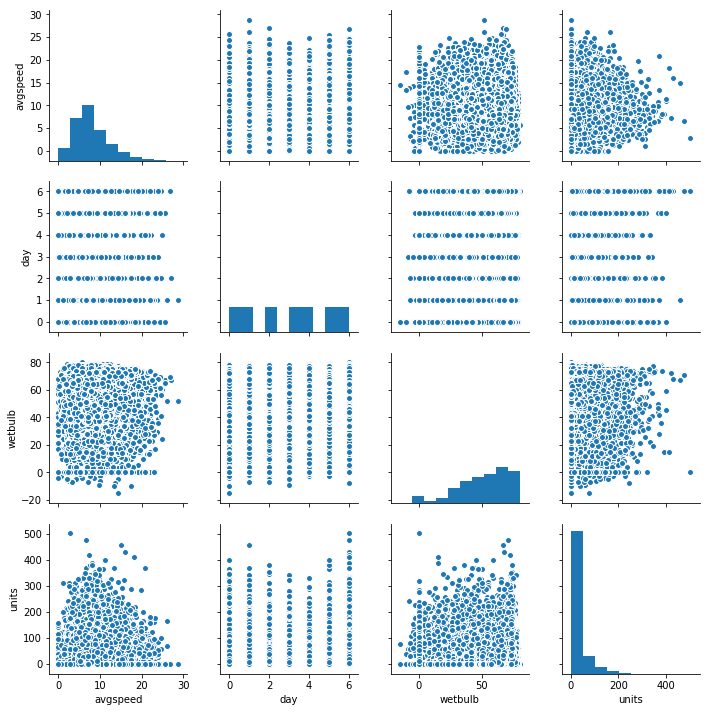

In [68]:
df = df_train_with_weather[df_train_with_weather["item_nbr"] == 9 ]

df["wetbulb"] = df["wetbulb"].apply(changeType)
df["avgspeed"] = df["avgspeed"].apply(changeFloatType)
df["units"] = df["units"].apply(changeType)
df["tavg"] = df["tavg"].apply(changeType)
df["snowfall"] = df["snowfall"].apply(changeFloatType)
df["depart"] = df["depart"].apply(changeType)

cols = ["avgspeed", "day", "wetbulb", "units"]
sns.pairplot(df[cols])
plt.show()

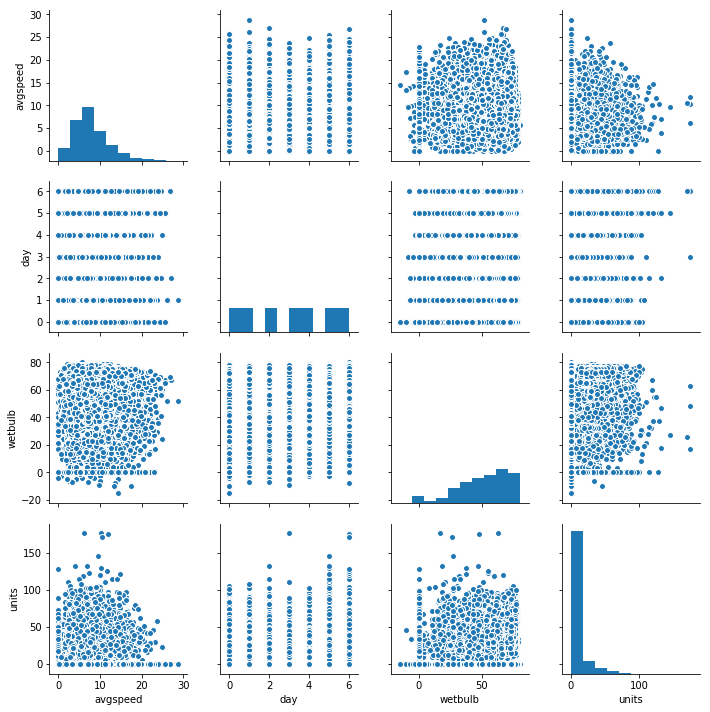

In [69]:
df = df_train_with_weather[df_train_with_weather["item_nbr"] == 16 ]

df["wetbulb"] = df["wetbulb"].apply(changeType)
df["avgspeed"] = df["avgspeed"].apply(changeFloatType)
df["units"] = df["units"].apply(changeType)
df["tavg"] = df["tavg"].apply(changeType)
df["snowfall"] = df["snowfall"].apply(changeFloatType)
df["depart"] = df["depart"].apply(changeType)

cols = ["avgspeed", "day", "wetbulb", "units"]
sns.pairplot(df[cols])
plt.show()

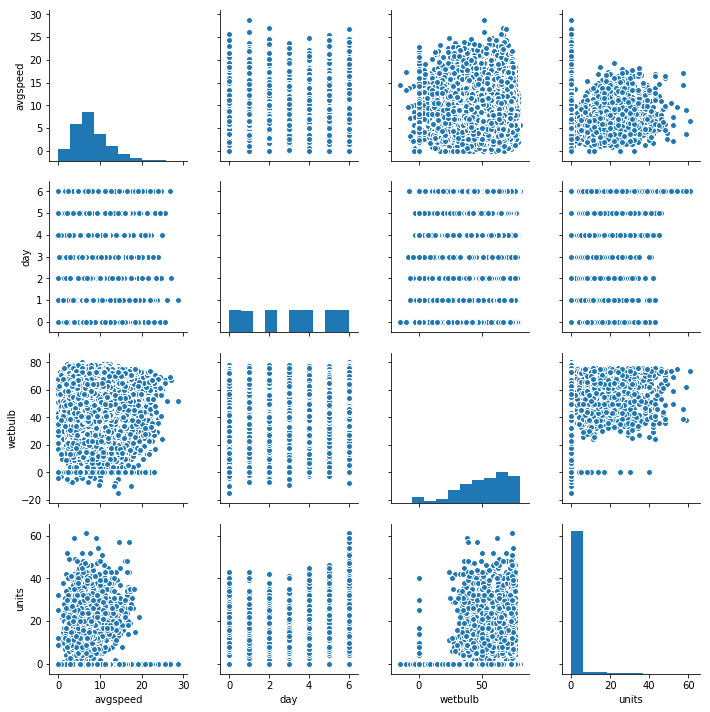

In [71]:
df = df_train_with_weather[df_train_with_weather["item_nbr"] == 23 ]

df["wetbulb"] = df["wetbulb"].apply(changeType)
df["avgspeed"] = df["avgspeed"].apply(changeFloatType)
df["units"] = df["units"].apply(changeType)
df["tavg"] = df["tavg"].apply(changeType)
df["snowfall"] = df["snowfall"].apply(changeFloatType)
df["depart"] = df["depart"].apply(changeType)

cols = ["avgspeed", "day", "wetbulb", "units"]
sns.pairplot(df[cols])
plt.show()

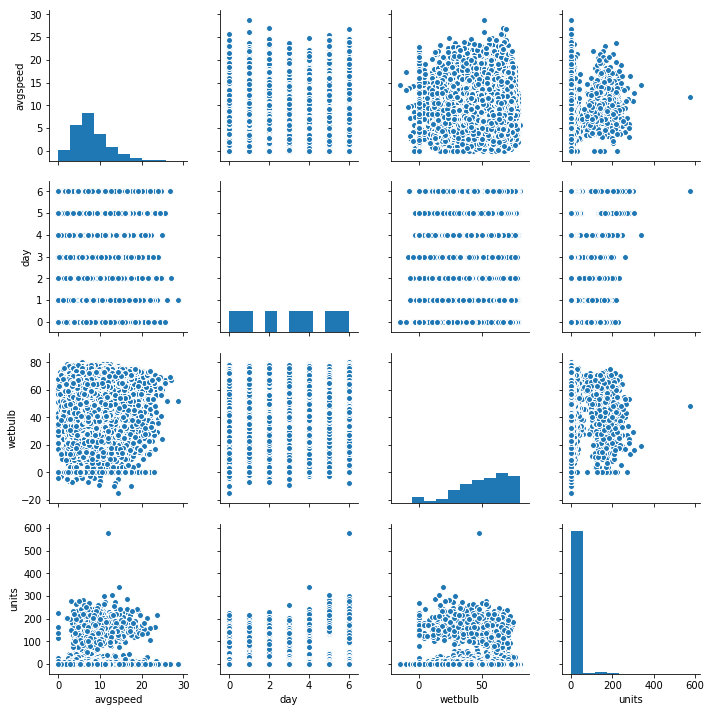

In [72]:
df = df_train_with_weather[df_train_with_weather["item_nbr"] == 25 ]

df["wetbulb"] = df["wetbulb"].apply(changeType)
df["avgspeed"] = df["avgspeed"].apply(changeFloatType)
df["units"] = df["units"].apply(changeType)
df["tavg"] = df["tavg"].apply(changeType)
df["snowfall"] = df["snowfall"].apply(changeFloatType)
df["depart"] = df["depart"].apply(changeType)

cols = ["avgspeed", "day", "wetbulb", "units"]
sns.pairplot(df[cols])
plt.show()

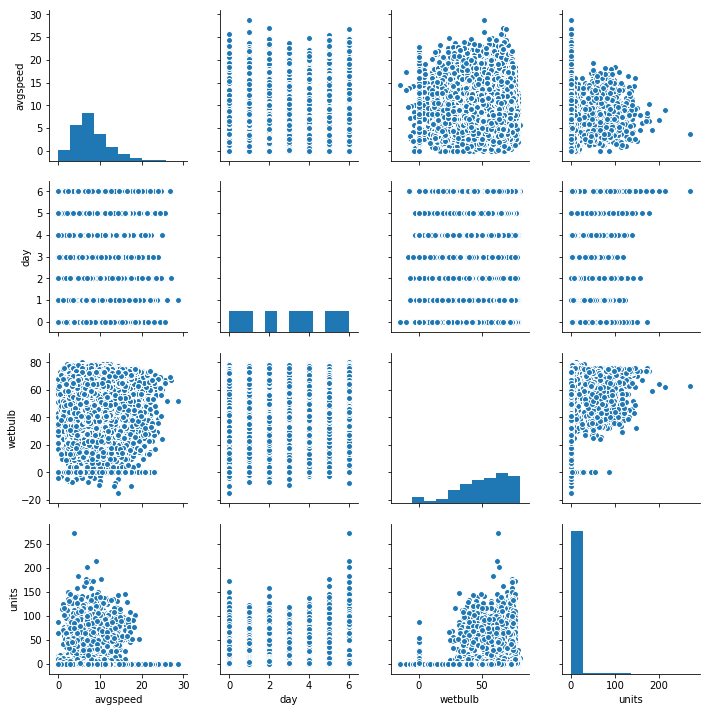

In [73]:
df = df_train_with_weather[df_train_with_weather["item_nbr"] == 36 ]

df["wetbulb"] = df["wetbulb"].apply(changeType)
df["avgspeed"] = df["avgspeed"].apply(changeFloatType)
df["units"] = df["units"].apply(changeType)
df["tavg"] = df["tavg"].apply(changeType)
df["snowfall"] = df["snowfall"].apply(changeFloatType)
df["depart"] = df["depart"].apply(changeType)

cols = ["avgspeed", "day", "wetbulb", "units"]
sns.pairplot(df[cols])
plt.show()

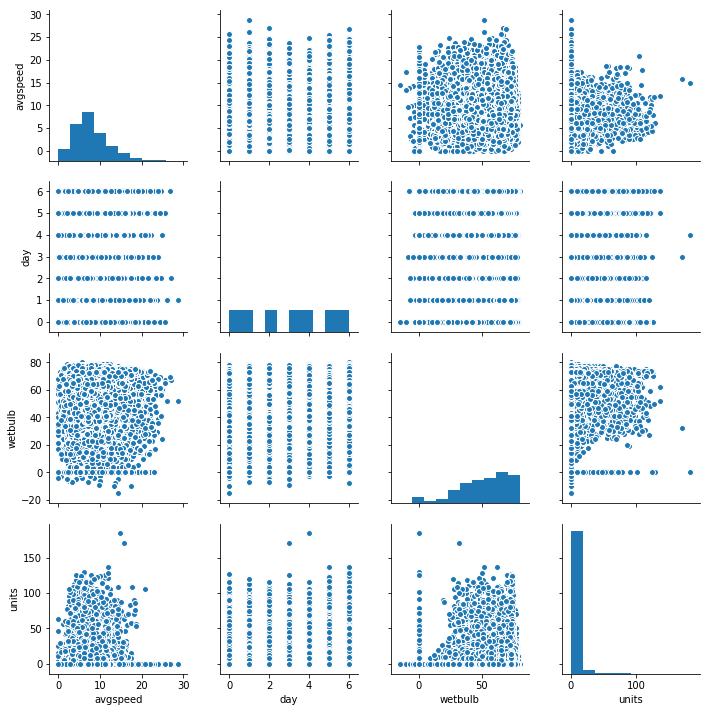

In [74]:
df = df_train_with_weather[df_train_with_weather["item_nbr"] == 37 ]

df["wetbulb"] = df["wetbulb"].apply(changeType)
df["avgspeed"] = df["avgspeed"].apply(changeFloatType)
df["units"] = df["units"].apply(changeType)
df["tavg"] = df["tavg"].apply(changeType)
df["snowfall"] = df["snowfall"].apply(changeFloatType)
df["depart"] = df["depart"].apply(changeType)

cols = ["avgspeed", "day", "wetbulb", "units"]
sns.pairplot(df[cols])
plt.show()

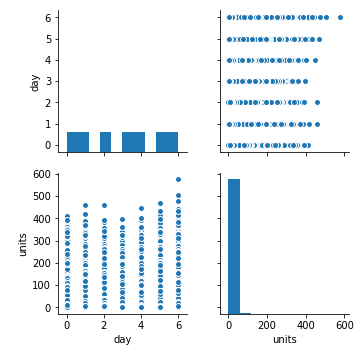

In [92]:
# df["avgspeed"] = df["avgspeed"].apply(changeFloatType)
# df["units"] = df["units"].apply(changeType)
# df["tavg"] = df["tavg"].apply(changeType)
# df["snowfall"] = df["snowfall"].apply(changeFloatType)
# df["depart"] = df["depart"].apply(changeType)

cols = ["day", "units"]
df_train_with_weather = df_train_with_weather[df_train_with_weather["units"] <2000]
sns.pairplot(df_train_with_weather[cols])
plt.show()

In [99]:
n = []
for i in range(6):
    n.append(sum(df_train_with_weather[df_train_with_weather["day"]==i]["units"]))

In [7]:
n = [669573, 587327, 560519, 548025, 617066, 738786]

In [104]:
n=np.array(n)
n

array([669573, 587327, 560519, 548025, 617066, 738786])

In [11]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=42504.287957743756, pvalue=0.0)